<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

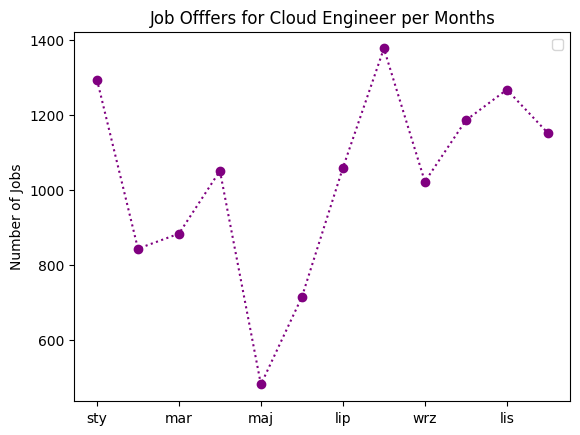

In [95]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.strftime('%b')
df_ce = df_ce.groupby('job_posted_month')['job_title_short'].size().reset_index()
df_ce['month_no'] = pd.to_datetime(df_ce['job_posted_month'], format='%b').dt.month
df_ce = df_ce.sort_values(by='month_no')
df_ce = df_ce.rename(columns={'job_title_short': 'job_count'})

df_ce.plot(kind='line', x='job_posted_month', y='job_count', linestyle=':', color='purple', marker='o')
plt.title('Job Offfers for Cloud Engineer per Months')
plt.xlabel('')
plt.ylabel('Number of Jobs')
plt.legend('')
plt.show()

#Luke solution
# df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
# df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
# monthly_job_postings = df_ce.groupby('job_posted_month').size()

# monthly_job_postings.plot( kind='line',  linestyle=':',  color='purple',  marker='o' )
# plt.title('Job Postings Trend for Cloud Engineers')
# plt.ylabel('Count of Job Postings')
# plt.xlabel('')
# plt.show()



---

## 🟨 Customize Bar Chart (2.16.2)

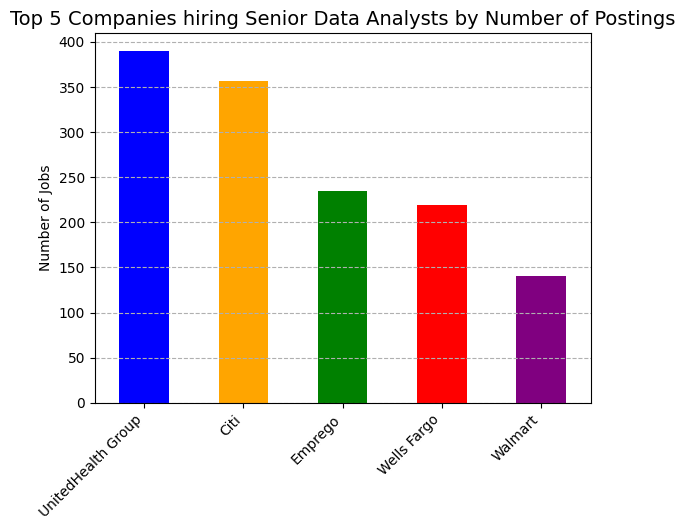

In [119]:
# Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
top_companies = SDA_df['company_name'].value_counts().head()

top_companies.plot(kind='bar', color=colors)
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--')
plt.show()

---